In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upload CSV file and read through
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Describe the content of the DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [4]:
# Clean df and keep columns that are needed for further analysis

dataset = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'target']]
dataset

,age,sex,cp,trestbps,chol,thalach,exang,target
0,52,1,0,125,212,168,0,0
1,53,1,0,140,203,155,1,0
2,70,1,0,145,174,125,1,0
3,61,1,0,148,203,161,0,0
4,62,0,0,138,294,106,0,0
...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,164,1,1
1021,60,1,0,125,258,141,1,0
1022,47,1,0,110,275,118,1,0
1023,50,0,0,110,254,159,0,1


In [5]:
# Rename columns in a new DataFrame

dataset.columns = ['Age', 'Sex', 'Type of chest pain', 'Rest BS', 'Cholesterol', 'MAX heart rate',
       'Exercise induced angina', 'Heart desease diagnosis']
dataset.head()

,Age,Sex,Type of chest pain,Rest BS,Cholesterol,MAX heart rate,Exercise induced angina,Heart desease diagnosis
0,52,1,0,125,212,168,0,0
1,53,1,0,140,203,155,1,0
2,70,1,0,145,174,125,1,0
3,61,1,0,148,203,161,0,0
4,62,0,0,138,294,106,0,0


In [6]:
#Find out mean values of the major factors that cause Heart desease 

avg = dataset.groupby('Heart desease diagnosis')[['Age', 'Rest BS', 'Cholesterol', 'MAX heart rate']].mean().round(2)
avg

,Age,Rest BS,Cholesterol,MAX heart rate
Heart desease diagnosis,,,,
0,56.57,134.11,251.29,139.13
1,52.41,129.25,240.98,158.59


Text(0.5, 1.0, 'Gender population')

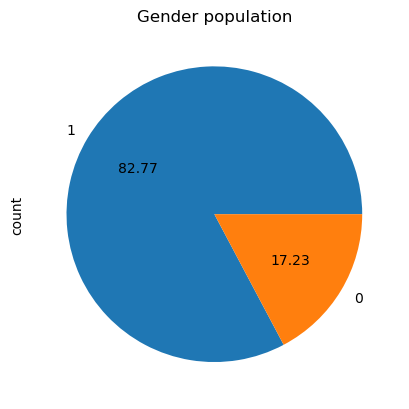

In [7]:
# Plot gender population of patients with Heart desease conditions

df_HC_0 = dataset[dataset['Heart desease diagnosis'] == 0]

df_HC_0['Sex'].value_counts().plot.pie(autopct='%.2f') 
plt.title('Gender population')


Text(0, 0.5, 'Cholesterol')

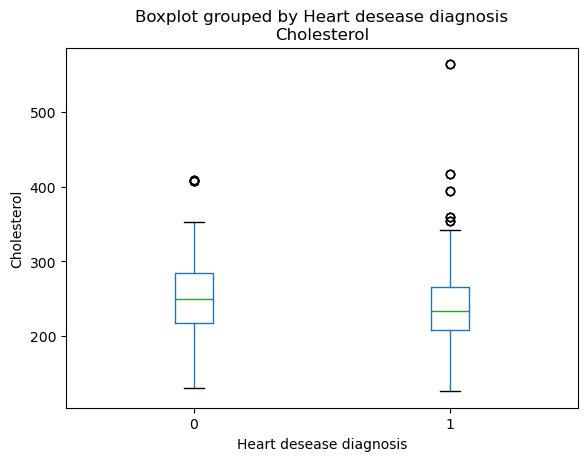

In [8]:
# Group patients with and without heart desease conditions, plot with reference to patients Cholesterol level

dataset.boxplot(by ='Heart desease diagnosis', column =['Cholesterol'], grid = False)
plt.ylabel('Cholesterol')

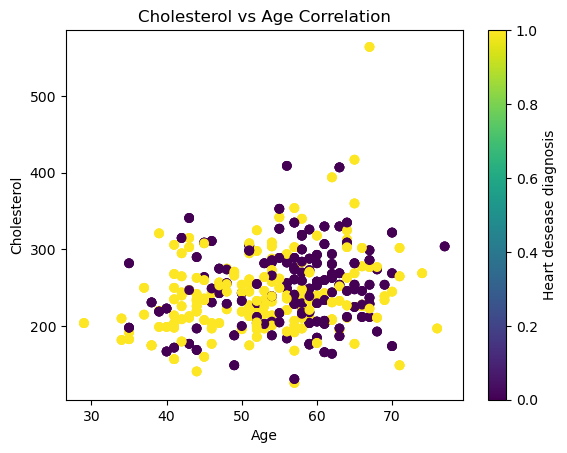

In [9]:
# Create a scatter plot of patients population age correlated to the cholesterol level

plt.scatter(dataset['Age'],dataset['Cholesterol'], c=dataset['Heart desease diagnosis'])
clb = plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Cholesterol")
clb.set_label("Heart desease diagnosis")
plt.title('Cholesterol vs Age Correlation')
plt.show()

Text(0, 0.5, 'Number of patients')

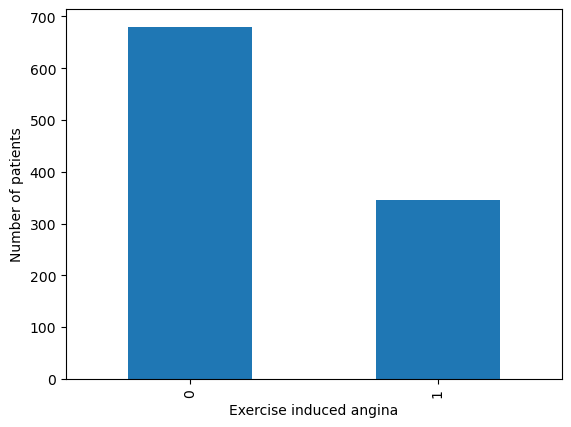

In [10]:
# Plot bar charts of patients with angina caused by excercise or not

dataset['Exercise induced angina'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients')

/var/folders/xn/3pkq9rt94zb_qff3dyqz_mmc0000gn/T/ipykernel_92859/650864452.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_exangina_0 = dataset[dataset['Exercise induced angina'] == 1][dataset['Heart desease diagnosis'] == 0]


<Axes: xlabel='Type of chest pain'>

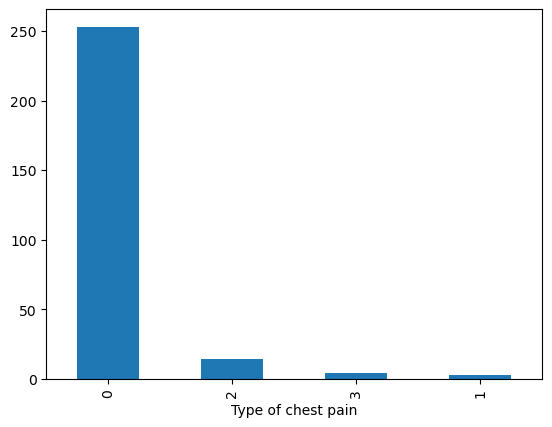

In [11]:
# Plot chart of patients by chest pain types with heart desease conditions and with non-exercise induced angina 

df_exangina_0 = dataset[dataset['Exercise induced angina'] == 1][dataset['Heart desease diagnosis'] == 0]
df_exangina_0['Type of chest pain'].value_counts().plot(kind='bar')